In [81]:
# loading packages
import pandas as pd
import os
import opensoundscape
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [82]:
# load datasets
CC_2004_07 = pd.read_csv('modified_annotations/MasterSheet_modification.csv')
CC_2004_07.head()

,audio_file,annotation,high_f,low_f,start_time,end_time
0,/Users/luisbarajas/Desktop/Projects/Course_Pro...,D,74,22,213.746,217.114
1,/Users/luisbarajas/Desktop/Projects/Course_Pro...,D,64,31,161.000,164.000
2,/Users/luisbarajas/Desktop/Projects/Course_Pro...,D,73,26,74.355,77.723
3,/Users/luisbarajas/Desktop/Projects/Course_Pro...,D,92,19,136.450,139.363
4,/Users/luisbarajas/Desktop/Projects/Course_Pro...,D,72,32,29.238,32.789


In [83]:
# audio file name and start time
audio_file_name = CC_2004_07['audio_file'][5]
start_time = CC_2004_07['start_time'][5]

audio_file_name, start_time

('/Users/luisbarajas/Desktop/Projects/Course_Projects/pstat_197/master_wav_sonobuoy/CC0407-SB9-040717-174000.wav',
 31.514)

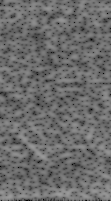

In [84]:
# collecting audio
audio = opensoundscape.Audio.from_file(audio_file_name, sample_rate=48000, offset=start_time, duration=6)

# create spectogram 
spec = opensoundscape.Spectrogram.from_audio(audio, window_type='hamming', window_samples=24000, 
                                                     overlap_samples=21600, fft_size=48000, 
                                                     scaling='density').bandpass(0, 200).to_image()

spec


In [85]:
# store image as two dimensional array
spec_image_arr = np.array(spec).astype(float)

spec_image_arr, spec_image_arr.shape

(array([[ 96.,  79.,  64., ..., 105., 105., 101.],
        [ 94.,  82.,  81., ...,  85.,  93.,  90.],
        [ 80.,  86.,  96., ...,  56.,  81.,  95.],
        ...,
        [137., 137., 141., ..., 132., 128., 134.],
        [129., 122., 131., ..., 116., 110., 131.],
        [112.,  26., 113., ...,  45.,  44., 117.]]),
 (201, 111))

In [86]:
def draw_img(img_vector, h=201, w=111):
    """
    1. takes img_vector,
    2. reshapes into right dimensions,
    3. draws the resulting image
    """
    
    
    plt.imshow( (img_vector).reshape(h,w), cmap=plt.cm.gray)
    
    plt.xticks(())
    plt.yticks(())

In [99]:
def frame_differecing(thres, spectogram):
    spectogram_mod = spectogram.copy()
    
    # take the absolute difference between the current frame and the previous frome
    for i in range(1, spectogram_mod.shape[0]):
        spectogram_mod[i, :] = np.fabs(spectogram_mod[i-1, :] - spectogram_mod[i, :])

    # apply threshould
    spectogram_mod[spectogram_mod <  thres ] = 0

    return spectogram_mod

In [88]:
def apply_median_filter(spectrogram, kernel_size=(3, 3)):
    # Extract the kernel size
    freq_window, time_window = kernel_size

    # Get spectrogram shape
    freq_bins, time_bins = spectrogram.shape

    # Initialize output spectrogram
    filtered_spectrogram = np.zeros_like(spectrogram)

    # Apply median filter
    for freq in range(freq_bins):
        for time in range(time_bins):
            # Define the window boundaries
            freq_start = max(0, freq - freq_window // 2)
            freq_end = min(freq_bins, freq + freq_window // 2 + 1)
            time_start = max(0, time - time_window // 2)
            time_end = min(time_bins, time + time_window // 2 + 1)

            # Extract the window
            window = spectrogram[freq_start:freq_end, time_start:time_end]

            # Calculate the median and assign it to the central pixel
            filtered_spectrogram[freq, time] = np.median(window)

    return filtered_spectrogram

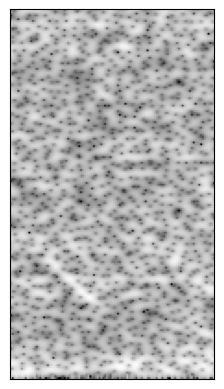

In [89]:
# original image
draw_img(spec_image_arr)

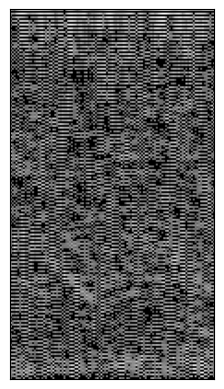

In [107]:
# frame differencing
draw_img(frame_differecing(50, spec_image_arr))

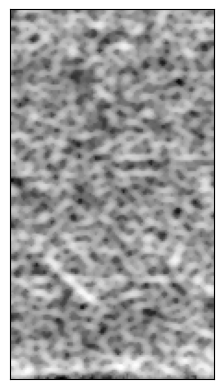

In [91]:
# median filter
draw_img(apply_median_filter(spec_image_arr))